In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('winequality.csv')

In [3]:
df.shape

(6497, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [7]:
df.isnull().sum().sort_values(ascending=False)

fixed acidity           10
pH                       9
volatile acidity         8
sulphates                4
citric acid              3
chlorides                2
residual sugar           2
quality                  0
alcohol                  0
density                  0
total sulfur dioxide     0
free sulfur dioxide      0
type                     0
dtype: int64

In [8]:
df.dropna(axis=0,inplace=True)

In [9]:
df.shape

(6463, 13)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027557624B48>,
      dtype=object)

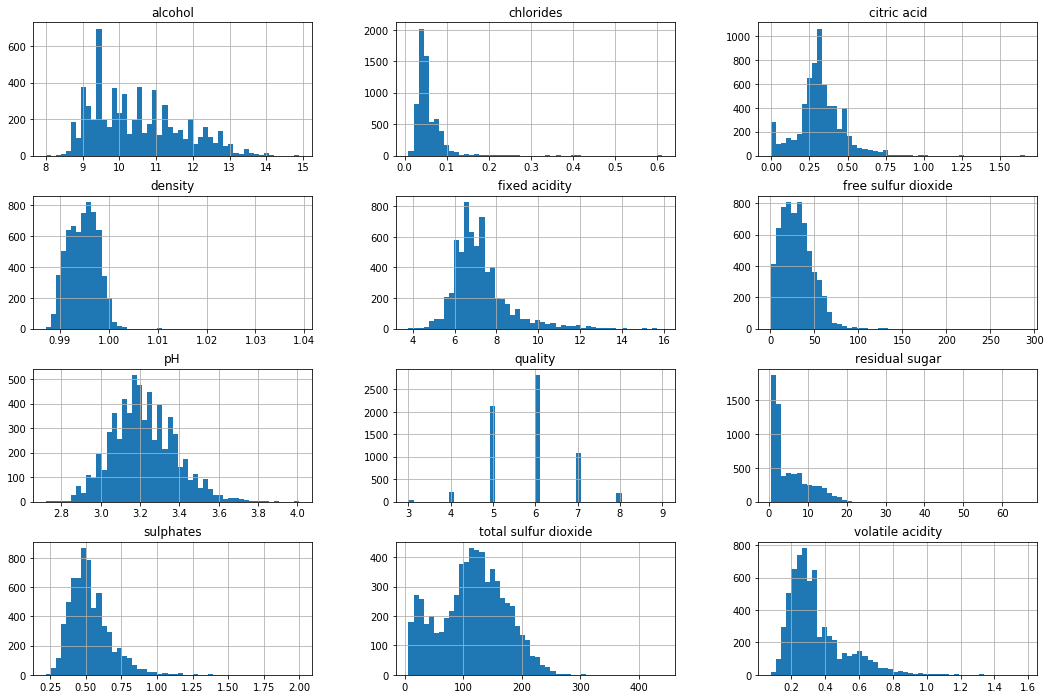

In [10]:
df.hist(bins=50,figsize=(18,12))

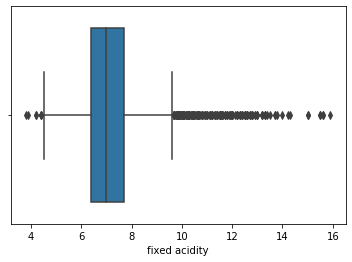

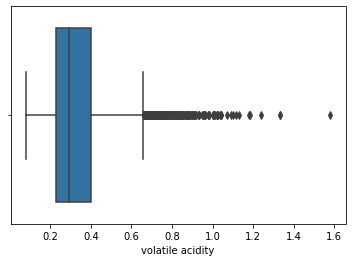

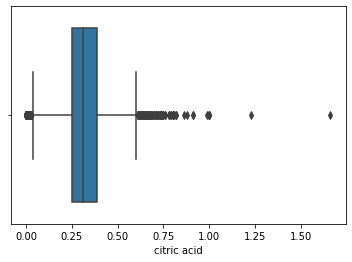

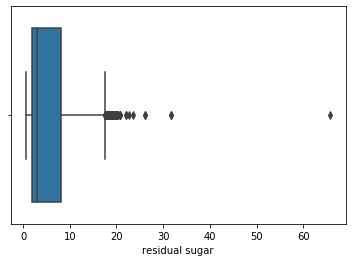

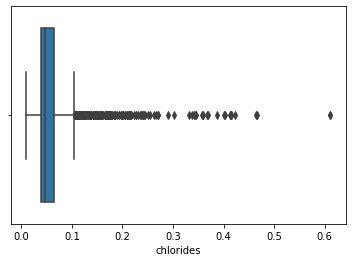

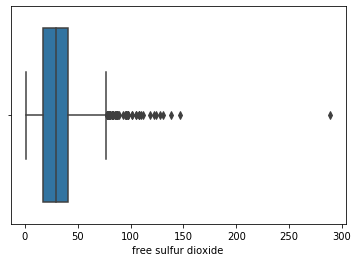

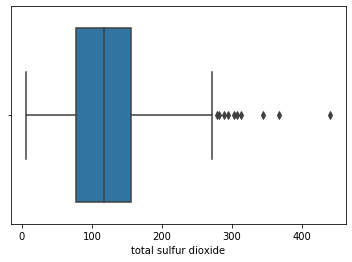

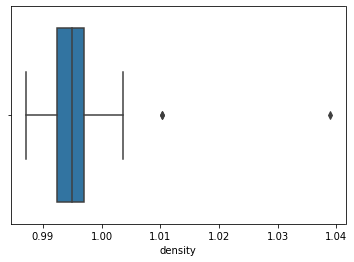

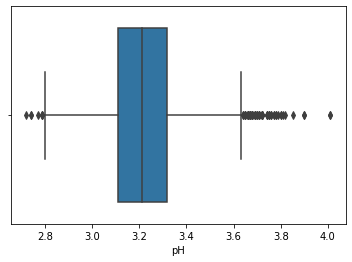

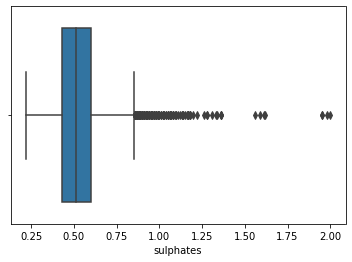

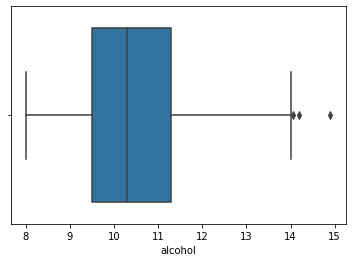

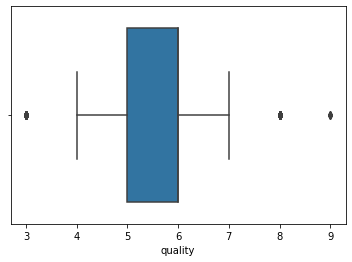

In [11]:
for i in df.iloc[:,1:]:
    plt.figure()
    sns.boxplot(df[i])

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64


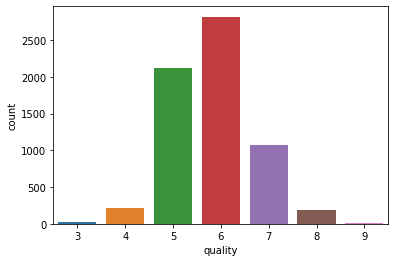

In [12]:
print(df['quality'].value_counts())
sns.countplot(df['quality'])

white    4870
red      1593
Name: type, dtype: int64


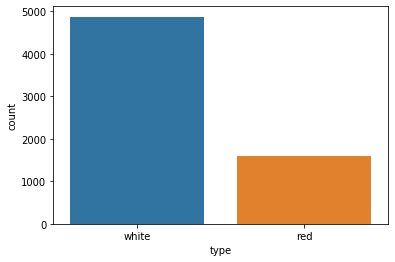

In [13]:
print(df['type'].value_counts())
sns.countplot(df['type'])

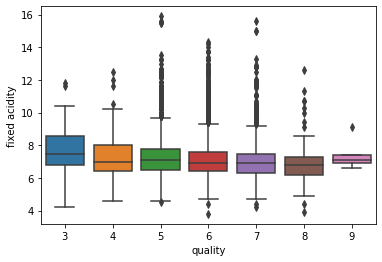

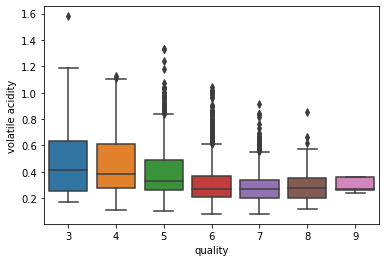

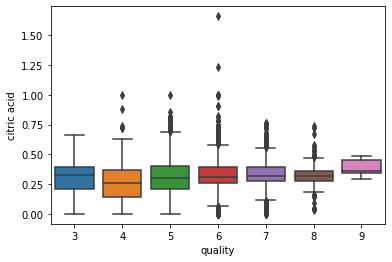

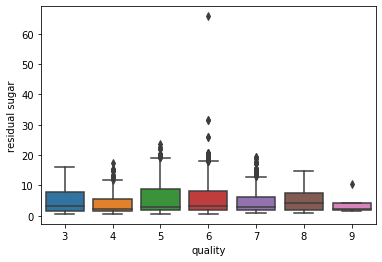

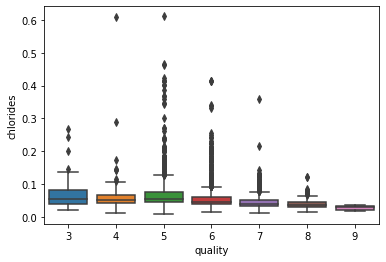

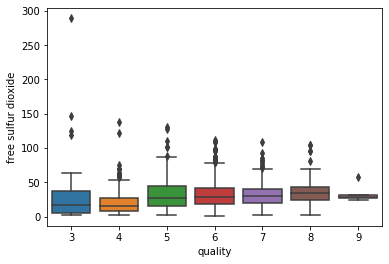

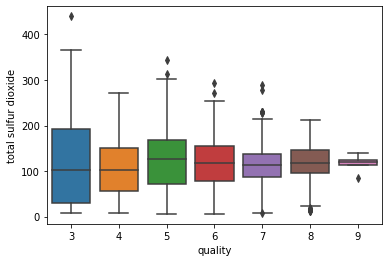

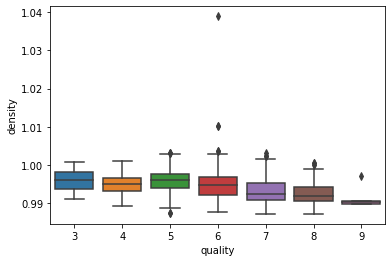

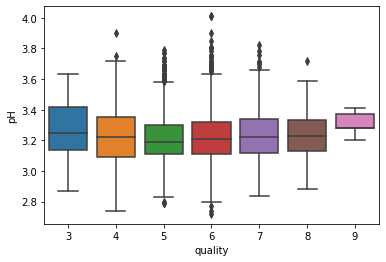

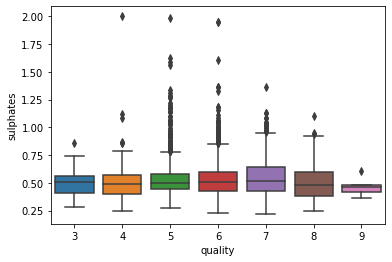

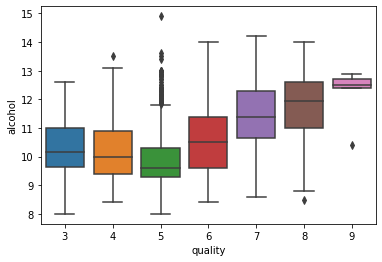

In [14]:
for i in df.iloc[:,1:-1]:
    plt.figure()
    sns.boxplot(x=df['quality'],y=df[i])

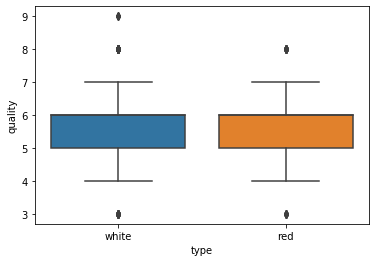

In [15]:
sns.boxplot(x=df['type'],y=df['quality'])

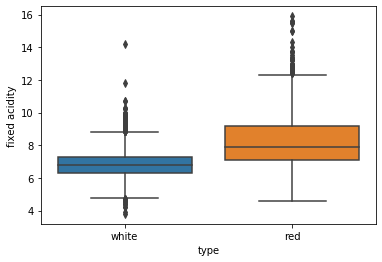

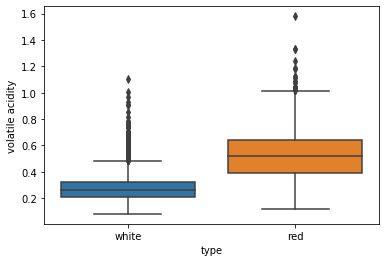

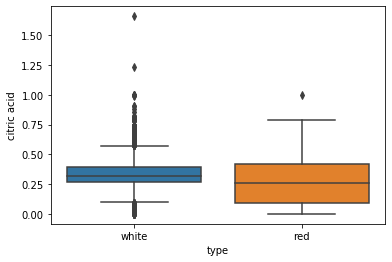

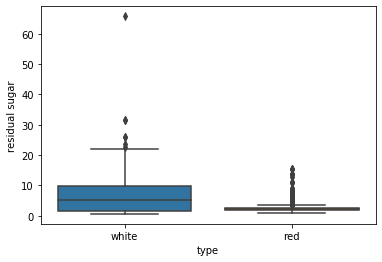

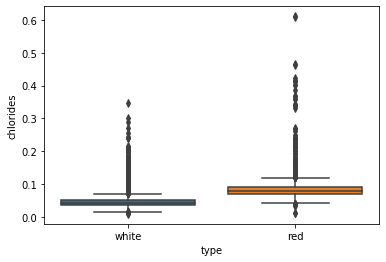

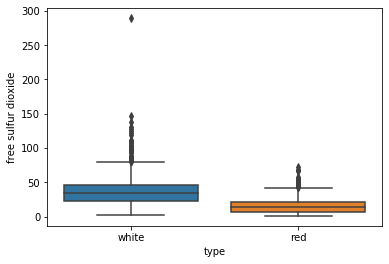

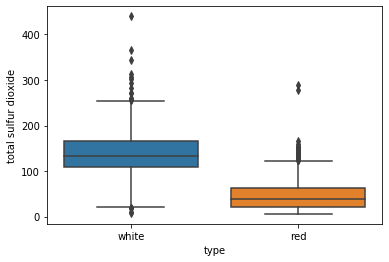

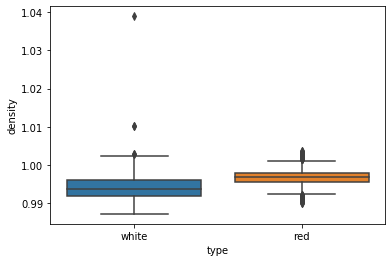

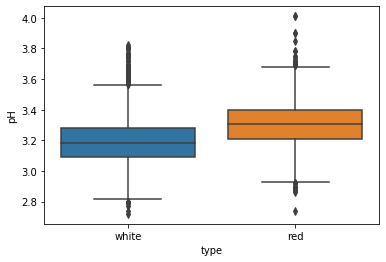

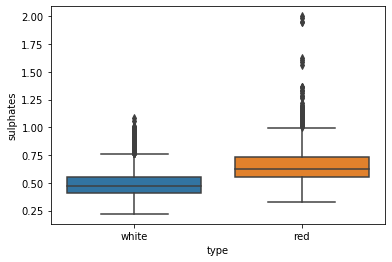

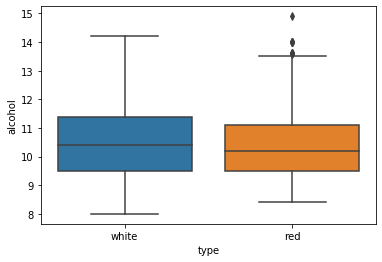

In [16]:
for i in df.iloc[:,1:-1]:
    plt.figure()
    sns.boxplot(x=df['type'],y=df[i])

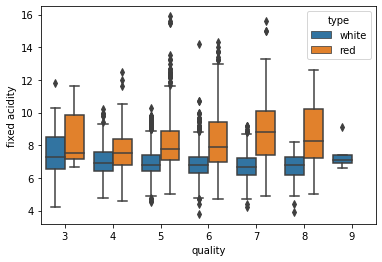

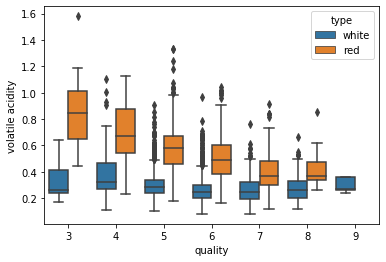

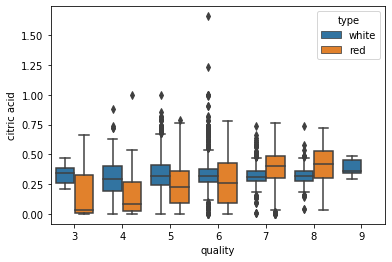

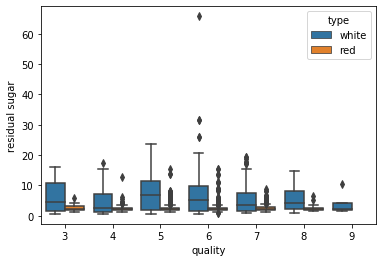

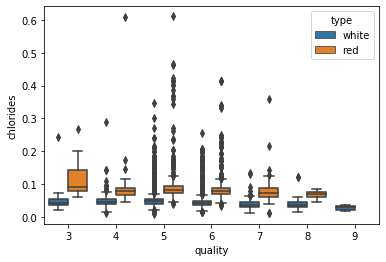

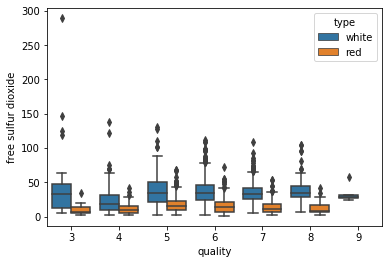

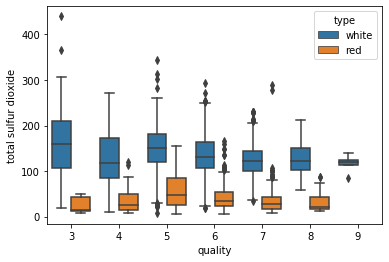

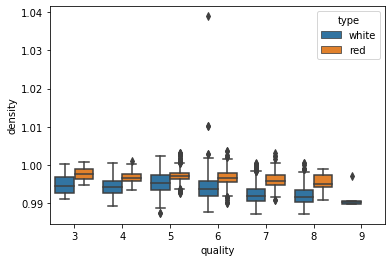

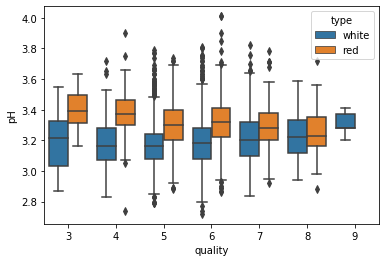

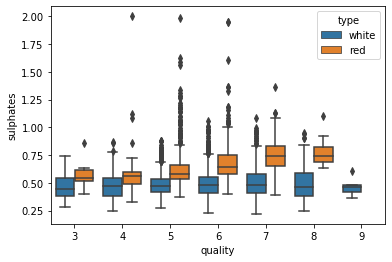

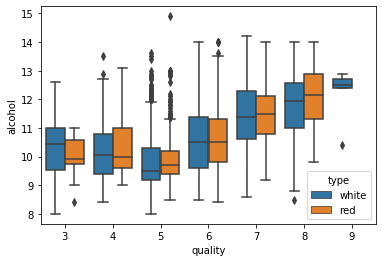

In [17]:
for i in df.iloc[:,1:-1]:
    plt.figure()
    sns.boxplot(x=df['quality'],y=df[i],hue=df['type'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002755AD28608>,
      dtype=object)

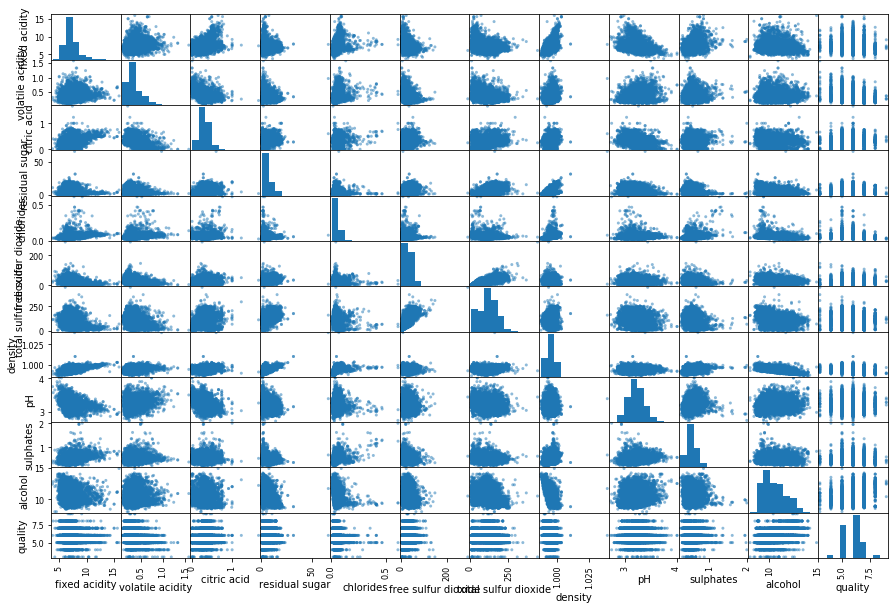

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(df.iloc[:,1:],figsize=(15,10))

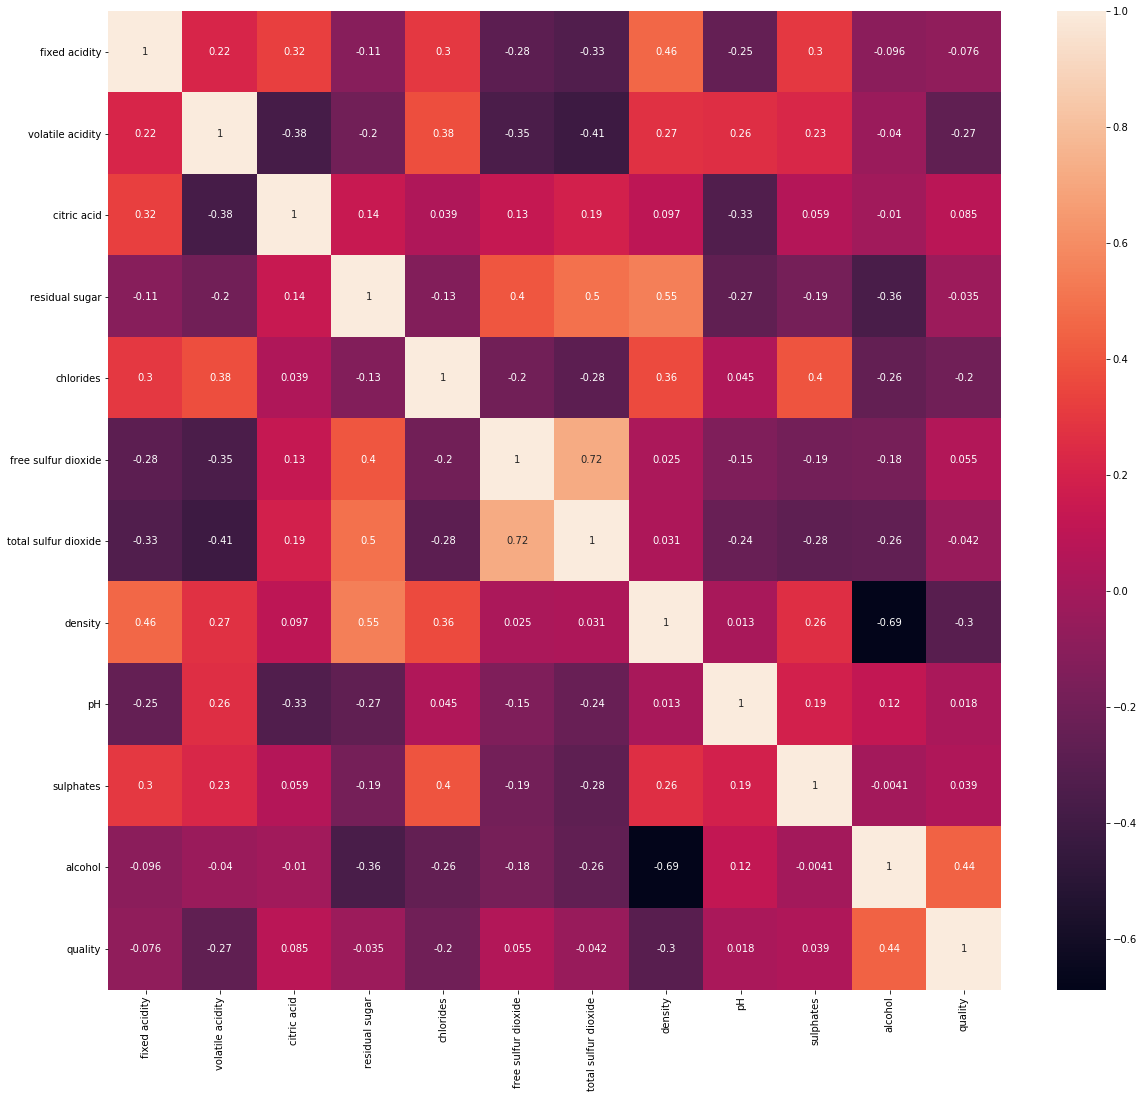

In [19]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr().iloc[:,0:],annot=True)

In [20]:
from scipy import stats
z=np.abs(stats.zscore(df.iloc[:,1:]))

In [21]:
np.where(z>3)

(array([   0,    7,   38,   39,  175,  184,  187,  188,  189,  200,  241,
         242,  244,  281,  283,  314,  314,  360,  383,  393,  430,  431,
         470,  515,  583,  641,  665,  669,  710,  721,  726,  754,  799,
         806,  809,  813,  838,  852,  855,  924, 1011, 1011, 1028, 1134,
        1139, 1193, 1205, 1226, 1231, 1233, 1248, 1345, 1361, 1393, 1393,
        1430, 1452, 1460, 1502, 1527, 1574, 1575, 1581, 1584, 1614, 1629,
        1629, 1639, 1639, 1657, 1664, 1664, 1698, 1751, 1811, 1818, 1832,
        1841, 1876, 1901, 1902, 1907, 1907, 1907, 1927, 2000, 2002, 2012,
        2026, 2026, 2103, 2130, 2162, 2162, 2297, 2310, 2312, 2325, 2349,
        2379, 2417, 2441, 2442, 2465, 2468, 2551, 2596, 2601, 2630, 2644,
        2680, 2681, 2687, 2704, 2711, 2724, 2726, 2747, 2757, 2757, 2757,
        2761, 2763, 2796, 2825, 2848, 2850, 2869, 2938, 2988, 2997, 2999,
        3017, 3024, 3038, 3040, 3046, 3061, 3126, 3126, 3239, 3257, 3262,
        3281, 3281, 3353, 3361, 3383, 

In [22]:
df=df[(z<3).all(axis=1)]

In [23]:
df.shape

(5955, 13)

In [24]:
from vif import cal_vif
cal_vif(df.iloc[:,1:])

,variables,VIF
0,fixed acidity,79.006438
1,volatile acidity,11.149188
2,citric acid,9.944547
3,residual sugar,3.931750
4,chlorides,13.680210
5,free sulfur dioxide,9.873117
6,total sulfur dioxide,16.098330
7,density,1029.110524
8,pH,650.956799
9,sulphates,22.666846


In [25]:
import statsmodels.api as sm
result=sm.OLS(df['quality'],df.iloc[:,1:-1]).fit()

In [26]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                          3.667e+04
Date:                Thu, 06 Aug 2020   Prob (F-statistic):                        0.00
Time:                        23:15:05   Log-Likelihood:                         -6424.9
No. Observations:                5955   AIC:                                  1.287e+04
Df Residuals:                    5944   BIC:                                  1.295e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [27]:
from sklearn.feature_selection import SelectKBest,chi2,RFECV
from sklearn.model_selection import ShuffleSplit,train_test_split

In [28]:
result=SelectKBest(chi2,k='all').fit(df.iloc[:,1:-1],df['quality'])

In [29]:
result.scores_

array([7.48756886e+00, 2.73513091e+01, 2.36683154e+00, 1.80629771e+02,
       3.63426999e+00, 7.96179834e+02, 1.00353343e+03, 6.03148774e-03,
       3.18898375e-02, 1.23067219e+00, 1.86076655e+02])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

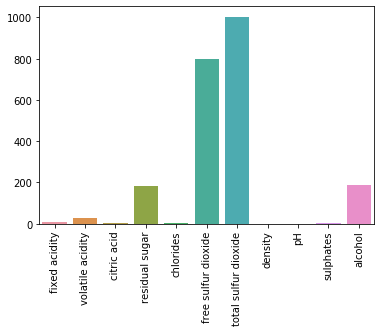

In [30]:
sns.barplot(x=np.array(df.columns)[1:-1],y=result.scores_)
plt.xticks(rotation='vertical')

In [31]:
df=df[['type','residual sugar','free sulfur dioxide','total sulfur dioxide','alcohol','quality']]

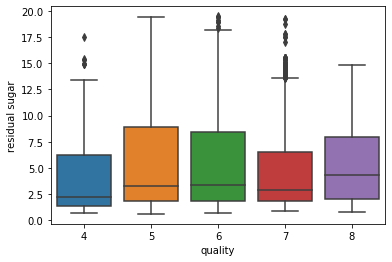

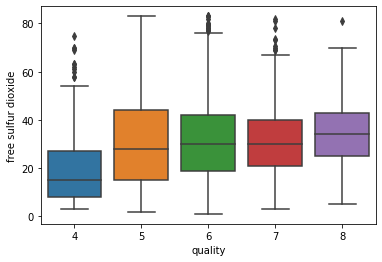

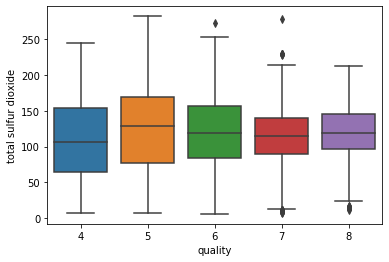

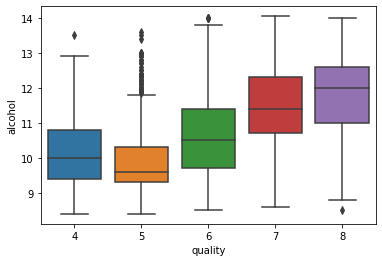

In [32]:
for i in df.iloc[:,1:-1]:
    plt.figure()
    sns.boxplot(df['quality'],df[i])

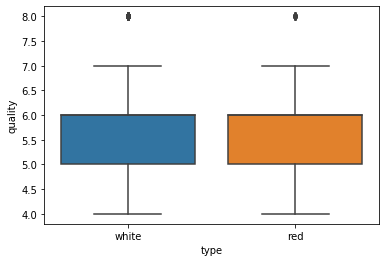

In [33]:
sns.boxplot(df['type'],df['quality'])

In [34]:
train,test=train_test_split(df,test_size=0.2,shuffle=True,random_state=42)

In [35]:
from sklearn.preprocessing import LabelEncoder
train['type']=LabelEncoder().fit_transform(train['type'])
test['type']=LabelEncoder().fit_transform(test['type'])

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVR

In [37]:
lr=LogisticRegression()
svm=SVR(kernel='linear')

In [38]:
#select=RFECV(lr,step=1,cv=5).fit(train.iloc[:,:-1],train.iloc[:,-1])
#print(select.support_)
#select.ranking_

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[ True  True False False  True]


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([1, 1, 2, 3, 1])

In [39]:
#np.concatenate((np.array(df.columns)[:-1],select.ranking_),axis=0)

array(['type', 'residual sugar', 'free sulfur dioxide',
       'total sulfur dioxide', 'alcohol', 1, 1, 2, 3, 1], dtype=object)

In [40]:
#result=LogisticRegression(random_state=0).fit(train.iloc[:,:-1],train.iloc[:,-1])

In [43]:
#result.score(train.iloc[:,:-1],train.iloc[:,-1])

In [44]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc=RandomForestClassifier(n_estimators=10000,random_state=0)
select=RFECV(lr,step=1,cv=5).fit(train.iloc[:,:-1],train.iloc[:,-1])
print(select.support_)
select.ranking_

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

[ True  True False False  True]


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([1, 1, 2, 3, 1])

In [46]:
rfc.fit(train.iloc[:,:-1],train.iloc[:,-1])
rfc.score(train.iloc[:,:-1],train.iloc[:,-1])

0.9995801847187238

In [48]:
from sklearn.metrics import accuracy_score
Y_predict=rfc.predict(train.iloc[:,:-1])
accuracy_score(Y_predict,train.iloc[:,-1])

0.9995801847187238